In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

from sim_utils import *
from simulation import *
from datetime import datetime

/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### dirichlet X mlp

In [2]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
    }
model_type = "gtm"
gtm_model_args = {
    "n_topics": num_topics,
    "num_epochs": 10,
    "update_prior": True,
    "doc_topic_prior": "logistic_normal",
    "decoder_type": "mlp"
    }
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[],"euclid":[]}
for i in range(num_simulations):

    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        doc_args=doc_args
        )
    s.estimate_distributions(
        is_output=True,
        model_args=gtm_model_args
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"]
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            doc_topic_prior=gtm_model_args["doc_topic_prior"],
            decoder_type=gtm_model_args["decoder_type"],
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th work".format(i+1))
    print("  ")
with open("../data/{}/score_dict_{}_{}_{}.pickle".format(model_type,num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]),"wb") as f:
    pickle.dump(score_dict,f)

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 5000/5000 [01:15<00:00, 66.28it/s]


Epoch   1	Iter   10	Loss:2.9726992	Rec Loss:1.9735179	MMD:0.9991814	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.5281749	Rec Loss:3.6639198	MMD:1.8642550	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9243557	Rec Loss:1.9238058	MMD:0.0005499	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.6856508	Rec Loss:3.6854692	MMD:0.0001816	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9676659	Rec Loss:1.9676270	MMD:0.0000388	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.6496048	Rec Loss:3.6495759	MMD:0.0000288	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9776999	Rec Loss:1.9776959	MMD:0.0000039	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.5710786	Rec Loss:3.5710292	MMD:0.0000493	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9461355	Rec Loss:1.9461355	MMD:0.0000000	Sparsity_Loss:0.0000000	Pred_Loss:0.

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 5000/5000 [01:16<00:00, 65.17it/s]


Epoch   1	Iter   10	Loss:3.0310996	Rec Loss:2.0128753	MMD:1.0182242	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.6308594	Rec Loss:3.7320714	MMD:1.8987882	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9754912	Rec Loss:1.9748933	MMD:0.0005979	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.6994651	Rec Loss:3.6993049	MMD:0.0001602	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9361031	Rec Loss:1.9360497	MMD:0.0000534	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7380950	Rec Loss:3.7380730	MMD:0.0000220	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9567666	Rec Loss:1.9567550	MMD:0.0000116	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6983367	Rec Loss:3.6982709	MMD:0.0000656	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9795444	Rec Loss:1.9795444	MMD:0.0000000	Sparsity_Loss:0.0000000	Pred_Loss:0.

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 5000/5000 [01:23<00:00, 60.17it/s]


Epoch   1	Iter   10	Loss:2.9226818	Rec Loss:1.9402066	MMD:0.9824751	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.6710833	Rec Loss:3.7604779	MMD:1.9106054	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9519099	Rec Loss:1.9514259	MMD:0.0004840	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.7719062	Rec Loss:3.7715943	MMD:0.0003120	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9773206	Rec Loss:1.9772855	MMD:0.0000351	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7670795	Rec Loss:3.7670647	MMD:0.0000148	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9310204	Rec Loss:1.9310166	MMD:0.0000038	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.7337519	Rec Loss:3.7337077	MMD:0.0000442	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:2.0123780	Rec Loss:2.0123780	MMD:0.0000000	Sparsity_Loss:0.0000000	Pred_Loss:0.

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 5000/5000 [01:26<00:00, 58.00it/s]


Epoch   1	Iter   10	Loss:2.9581633	Rec Loss:1.9630549	MMD:0.9951082	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.5043299	Rec Loss:3.6409811	MMD:1.8633490	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9888649	Rec Loss:1.9882562	MMD:0.0006087	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.8139222	Rec Loss:3.8136960	MMD:0.0002261	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9648731	Rec Loss:1.9648380	MMD:0.0000350	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7153657	Rec Loss:3.7153363	MMD:0.0000294	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9530598	Rec Loss:1.9530520	MMD:0.0000077	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6558167	Rec Loss:3.6557732	MMD:0.0000435	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9902867	Rec Loss:1.9902867	MMD:0.0000000	Sparsity_Loss:0.0000000	Pred_Loss:0.

/Users/shim-kojio/Desktop/internship/codes/notebook/../src/sim_gtm.py:69: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  doc_topic_raw_list.append(np.random.multivariate_normal(mean, sigma))
100%|██████████| 5000/5000 [01:27<00:00, 56.87it/s]


Epoch   1	Iter   10	Loss:2.9988341	Rec Loss:1.9906421	MMD:1.0081919	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.6559771	Rec Loss:3.7466922	MMD:1.9092847	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9604537	Rec Loss:1.9598808	MMD:0.0005729	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.6355497	Rec Loss:3.6354060	MMD:0.0001436	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9505121	Rec Loss:1.9504734	MMD:0.0000386	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.6518804	Rec Loss:3.6518804	MMD:0.0000000	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9397150	Rec Loss:1.9397074	MMD:0.0000077	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.7008119	Rec Loss:3.7007534	MMD:0.0000585	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9386916	Rec Loss:1.9386878	MMD:0.0000038	Sparsity_Loss:0.0000000	Pred_Loss:0.

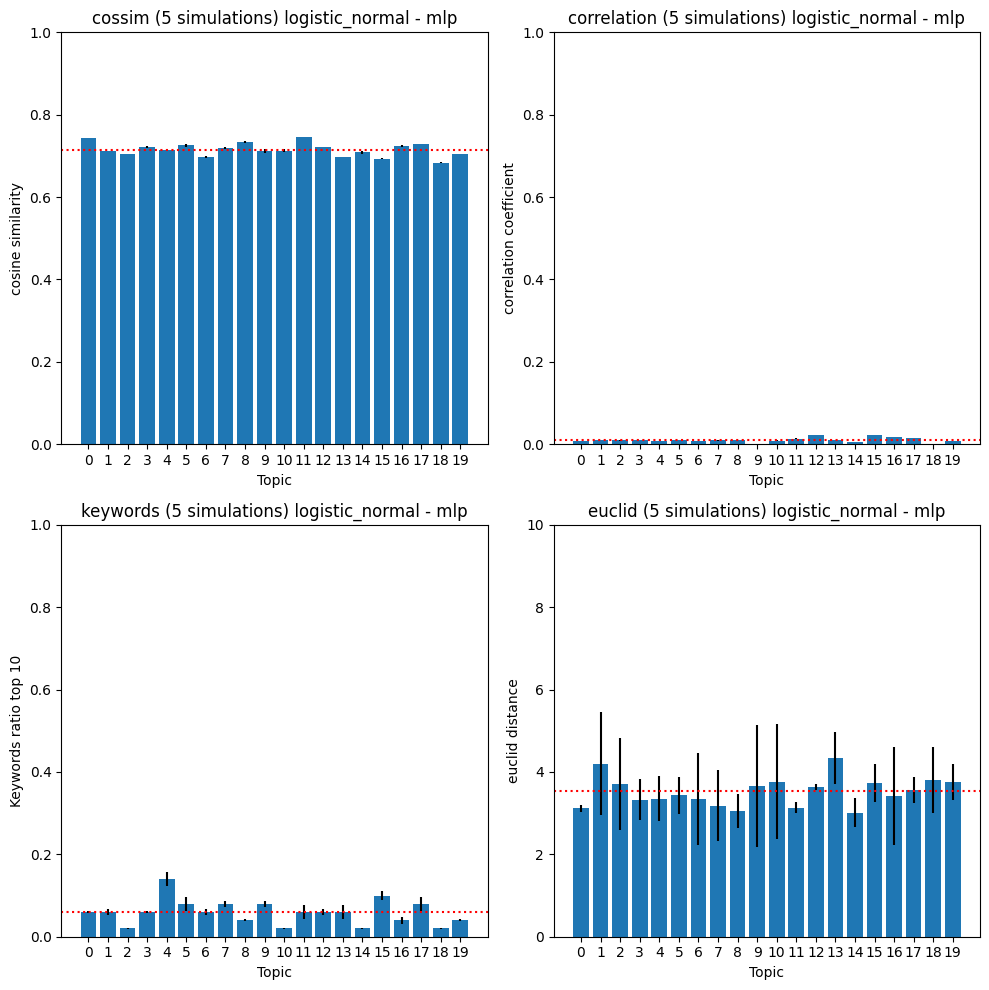

In [3]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 10)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations) {} - {}".format(score_type_list[i],num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()